https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas
https://www.listendata.com/2019/04/create-dummy-data-in-python.html

# 1.  Generating synthetic data

In [82]:
import pandas as pd
import numpy as np
import random

%matplotlib inline

## 1.1 Rules for data generation
- We would like the age to be between 14 to 35
- Gender should be either 0 or 1, 0 being female and 1 male.
- Status would be calcauted using , two simple rules
    - A worker must be 18 years or above for male
    - A worker must be 20 years or above for female

In [98]:
np.random.seed(1)
data = pd.DataFrame({"age"  : np.random.choice(range(15,35), 500),
                     "gender"  : np.random.choice(range(0,2), 500)})
data["is_underage"] = (data["gender"] == 1) & (data["age"] <= 18) | (data["gender"] == 0) & (data["age"] <= 20) 


gender
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

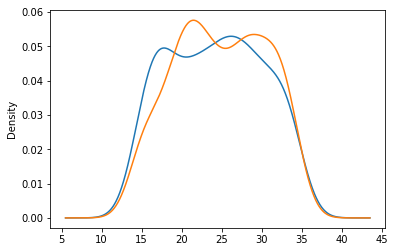

In [99]:
data.groupby('gender').age.plot(kind='kde')

# 2. Pre-Processing

## 2.1. Train Test spilt

In [57]:
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

In [58]:
train.describe()

,age,gender
count,400.000000,400.0
mean,24.577500,1.0
std,5.702657,0.0
min,15.000000,1.0
25%,20.000000,1.0
50%,25.000000,1.0
75%,29.000000,1.0
max,34.000000,1.0


In [59]:
test.describe()

,age,gender
count,100.000000,100.0
mean,24.420000,1.0
std,5.775567,0.0
min,15.000000,1.0
25%,19.750000,1.0
50%,24.000000,1.0
75%,30.000000,1.0
max,34.000000,1.0


### A Simple Neural Network

# 3. Without NumPy

In [67]:
def weighted_sum(a,b):
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def neural_network(input,weights):
    pred = weighted_sum(input,weights)
    return pred

## 3.1.Taking multiple inputs into a neural network


In [68]:
# Random weights
weights = [0.5,0.48]
age = train['age'].values.tolist()[1]
gender = train['gender'].values.tolist()[1]
input = [age,gender]
pred = neural_network(input,weights)
print(pred)

13.48


## 3.2. Making a prediction with multiple outputs

In [69]:
def element_mul(number,vector):
    output = [0,0,0]
    for i in range (len(vector)):
        output[i] = number * number[i]
        
    return output   

In [70]:
def neural_network_mul_output(input,weigts):
    pred = element_mul(input,weights)
    return pred

## 3.3 Making a prediction with multiple inputs and outputs

In [71]:
def vector_math_mul(vector,matrix):
    assert (len(vector) == len(matrix))
    
    output = [0,0]
    for i in range (len(vector)):
        output[i] = weighted_sum(vector,matrix[i])
    return output

def neural_network_mul_in_out(input,weights):
    pred = vector_math_mul(input,weights)
    return pred


In [72]:
            #age #gender
weights = [[0.5,0.48], #not underage
            [0.2,0.6]] #underage
age = train['age'].values.tolist()[0:4]
gender = train['gender'].values.tolist()[0:4]

input = [age[0],gender[0]]
pred = neural_network_mul_in_out(input,weights)
print(pred)

[14.48, 6.2]


## 3.4 Stacking neural networks

In [73]:
def neural_network_stacked(input,weights):
    hidden = vector_math_mul(input,weights[0])
    pred = vector_math_mul(hidden,weights[1])
    return pred

In [74]:
input_weights = [[0.5,0.48],
            [0.2,0.6]]

hidden_layer_weights = [[0.3,0.0],
            [0.1,1.3]] 

weights = [input_weights,hidden_layer_weights]

In [54]:
age = train['age'].values.tolist()[0:4]
gender = train['gender'].values.tolist()[0:4]

input = [age[0],gender[0]]
pred = neural_network_stacked(input,weights)
print(pred)

[4.344, 9.508000000000001]


#### Yes libraries

In [76]:
## todo: add stacked neural net created using numpy